# Major Leagues

# Introduction

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. I used Lasso Regression, Linear Regression and Random Forest Regression models for this project. 

# Loading the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/spi_matches.csv', encoding='utf-8')

In [3]:
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,12-08-2016,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,12-08-2016,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,13-08-2016,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,13-08-2016,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,13-08-2016,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [4]:
reg_df = df.drop(columns=['date','league_id','league','team1','team2'])
reg_df.describe()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,32292.000000,32292.000000,32292.000000,32292.000000,32292.000000,32292.000000,32292.000000,23948.000000,23948.000000,28240.000000,28240.000000,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000
mean,45.056564,45.003234,0.452435,0.294473,0.253092,1.527233,1.155343,31.312849,30.639093,1.534313,1.171282,1.507819,1.156104,1.418716,1.131262,1.553896,1.179542
std,19.021098,19.007820,0.159338,0.143243,0.048084,0.432720,0.425020,25.969452,25.633691,1.282984,1.133444,0.831921,0.725052,0.655838,0.569318,1.250020,1.120577
min,3.880000,4.040000,0.027100,0.003200,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.160000,31.150000,0.352100,0.201000,0.234500,1.250000,0.890000,11.000000,10.600000,1.000000,0.000000,0.890000,0.610000,0.960000,0.730000,1.050000,0.000000
50%,43.010000,42.900000,0.444200,0.278600,0.261000,1.460000,1.110000,26.200000,25.300000,1.000000,1.000000,1.380000,1.030000,1.330000,1.050000,1.050000,1.050000
75%,58.470000,58.310000,0.542000,0.368300,0.282500,1.730000,1.370000,45.400000,44.600000,2.000000,2.000000,1.980000,1.550000,1.760000,1.430000,2.100000,2.100000
max,96.570000,96.780000,0.977500,0.899200,0.453700,4.900000,4.010000,100.000000,100.000000,10.000000,9.000000,7.070000,6.200000,6.890000,5.920000,9.150000,7.930000


In [5]:
#Dropping nas
reg_df.dropna(subset=['score1','score2'],inplace=True)

In [6]:
# Fill Empty or NaN values with the mean
reg_df.fillna(reg_df.mean(),inplace=True)
reg_df.isna().sum()

spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

In [7]:
no_score_df = reg_df.drop(columns=['score1','score2'])

# Test and Train data split

In [8]:
# Split Total Data into Train and Test
from sklearn.model_selection import train_test_split

team1X_train, team1X_test, team1Y_train, team1Y_test = train_test_split(no_score_df, reg_df.score1, random_state=1)

In [9]:
#Lasso regression for Team1

In [10]:
from sklearn.linear_model import Lasso

# Linear Regression 

team1Reg = Lasso()
team1Reg.fit(team1X_train,team1Y_train)

Lasso()

In [11]:
team1Predict_train = team1Reg.predict(team1X_train)
team1Predict_test = team1Reg.predict(team1X_test)

# Lasso Regression for Team 1

In [30]:
# Print Lasso Regression Mean Square Error for Team 1

lfTrainTeam1MSE = round(np.mean(np.subtract(team1Y_train.values,team1Predict_train) ** 2),3)
print(lfTrainTeam1MSE)
lfTestTeam1MSE = round(np.mean(np.subtract(team1Y_test.values,team1Predict_test) ** 2),3)
print(lfTestTeam1MSE)

0.709
0.731


Text(0.5, 1.0, 'Residual Plot for Team 1 - Train:Green and Test:Orange')

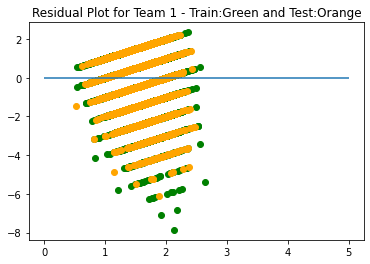

In [13]:
plt.scatter(team1Predict_train,np.subtract(team1Predict_train,team1Y_train.values),c='g')
plt.scatter(team1Predict_test,np.subtract(team1Predict_test,team1Y_test.values),c='orange')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 1 - Train:Green and Test:Orange')

# Lasso Regression for Team2

In [14]:
from sklearn.model_selection import train_test_split

team2X_train, team2X_test, team2Y_train, team2Y_test = train_test_split(no_score_df, reg_df.score2, random_state=5)

from sklearn.linear_model import Lasso
team2Reg = Lasso()
team2Reg.fit(team2X_train,team2Y_train)

Lasso()

In [15]:
# Print Lasso Regression Mean Square Error for Team 2

team2Predict_train = team2Reg.predict(team2X_train)
team2Predict_test = team2Reg.predict(team2X_test)

lfTrainTeam2MSE = round(np.mean(np.subtract(team2Y_train.values,team2Predict_train) ** 2),3)
lfTestTeam2MSE = round((np.mean(np.subtract(team2Y_test.values,team2Predict_test) ** 2)),3)

print(lfTrainTeam2MSE)
print(lfTestTeam2MSE)

1.203
1.226


Text(0.5, 1.0, 'Residual Plot for Team 2 - Train:Green and Test:Orange')

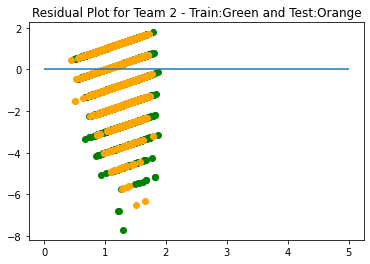

In [16]:
plt.scatter(team2Predict_train,np.subtract(team2Predict_train,team2Y_train.values),c='g')
plt.scatter(team2Predict_test,np.subtract(team2Predict_test,team2Y_test.values),c='orange')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 2 - Train:Green and Test:Orange')

# Linear Regression for Team1

In [17]:
from sklearn.linear_model import LinearRegression

# Linear Regression 

team1Reg = LinearRegression()
team1Reg.fit(team1X_train,team1Y_train)

LinearRegression()

In [18]:
team1Predict_train = team1Reg.predict(team1X_train)
team1Predict_test = team1Reg.predict(team1X_test)

In [19]:
# Print Linear Regression Mean Square Error for Team 1

lfTrainTeam1MSE = round(np.mean(np.subtract(team1Y_train.values,team1Predict_train) ** 2),3)
print(lfTrainTeam1MSE)
lfTestTeam1MSE = round(np.mean(np.subtract(team1Y_test.values,team1Predict_test) ** 2),3)
print(lfTestTeam1MSE)

0.709
0.731


Text(0.5, 1.0, 'Residual Plot for Team 1 - Train:Green and Test:Orange')

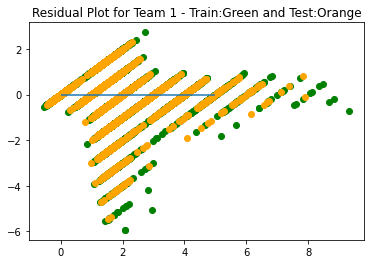

In [20]:
plt.scatter(team1Predict_train,np.subtract(team1Predict_train,team1Y_train.values),c='g')
plt.scatter(team1Predict_test,np.subtract(team1Predict_test,team1Y_test.values),c='orange')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 1 - Train:Green and Test:Orange')

# Linear Regression for Team2

In [21]:
from sklearn.model_selection import train_test_split

team2X_train, team2X_test, team2Y_train, team2Y_test = train_test_split(no_score_df, reg_df.score2, random_state=5)

from sklearn.linear_model import LinearRegression
team2Reg = LinearRegression()
team2Reg.fit(team2X_train,team2Y_train)

LinearRegression()

In [22]:
# Print Linear Regression Mean Square Error for Team 2

team2Predict_train = team2Reg.predict(team2X_train)
team2Predict_test = team2Reg.predict(team2X_test)

lfTrainTeam2MSE = round(np.mean(np.subtract(team2Y_train.values,team2Predict_train) ** 2),3)
lfTestTeam2MSE = round((np.mean(np.subtract(team2Y_test.values,team2Predict_test) ** 2)),3)

print(lfTrainTeam2MSE)
print(lfTestTeam2MSE)

0.554
0.56


Text(0.5, 1.0, 'Residual Plot for Team 2 - Train:Green and Test:Orange')

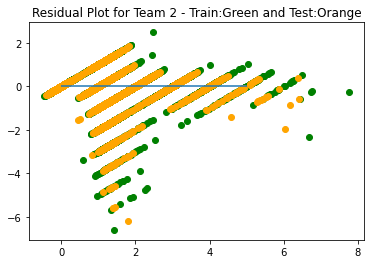

In [23]:
plt.scatter(team2Predict_train,np.subtract(team2Predict_train,team2Y_train.values),c='g')
plt.scatter(team2Predict_test,np.subtract(team2Predict_test,team2Y_test.values),c='orange')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 2 - Train:Green and Test:Orange')

# Random Forest Regressor For Team1

In [24]:
# Regression Model - Team 1
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rfTeam1 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfTeam1.fit(team1X_train,team1Y_train);

In [25]:
# Print Random Forest Regression Mean Square Error for Team 1

rfPredictTrainTeam1 = rfTeam1.predict(team1X_train)
# Calculate the Square errors
rfErrorTrainTeam1 = (rfPredictTrainTeam1 - team1Y_train)**2
rfTrainTeam1MSE =  round(np.mean(rfErrorTrainTeam1),3)
print('Mean Square Error Train:', rfTrainTeam1MSE)



rfPredictTeam1 = rfTeam1.predict(team1X_test)
rfErrorTeam1 = (rfPredictTeam1 - team1Y_test)**2
rfTestTeam1MSE = round(np.mean(rfErrorTeam1),3)
print('Mean Square Error Test:', rfTestTeam1MSE)

Mean Square Error Train: 0.099
Mean Square Error Test: 0.73


# Random Forest Regression for Team2

In [26]:
# Regression for Team 2

from sklearn.ensemble import RandomForestRegressor
rfTeam2 = RandomForestRegressor(n_estimators = 100, random_state = 62)
rfTeam2.fit(team2X_train,team2Y_train);

In [27]:
# Print Random Forest Regression Mean Square Error for Team 2

rfPredictTrainTeam2 = rfTeam2.predict(team2X_train)
# Calculate the Square errors
rfErrorTrainTeam2 = (rfPredictTrainTeam2 - team2Y_train)**2
# Print out the mean absolute error (mae)
rfTrainTeam2MSE =  round(np.mean(rfErrorTrainTeam2),3)
print('Mean Square Error Train:', rfTrainTeam2MSE)


# Use the forest's predict method on the test data
rfPredictTeam2 = rfTeam2.predict(team2X_test)
# Calculate the absolute errors
rfErrorTeam2 = (rfPredictTeam2 - team2Y_test) **2
# Print out the mean absolute error (mae)
rfTestTeam2MSE = round(np.mean(rfErrorTeam2),3)
print('Mean Square Error Test:', rfTestTeam2MSE)

Mean Square Error Train: 0.078
Mean Square Error Test: 0.573


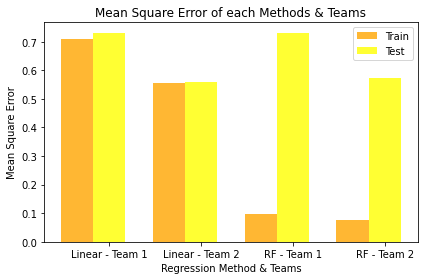

In [28]:
# Plot the Mean Square Error for Comparison
n_groups = 4
train_mse = (lfTrainTeam1MSE, lfTrainTeam2MSE,rfTrainTeam1MSE,rfTrainTeam2MSE)
test_mse = (lfTestTeam1MSE,lfTestTeam2MSE,rfTestTeam1MSE,rfTestTeam2MSE)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, train_mse, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='Train')
 
rects2 = plt.bar(index + bar_width, test_mse, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Test')
 
plt.xlabel('Regression Method & Teams')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of each Methods & Teams')
plt.xticks(index + bar_width, ('Linear - Team 1', 'Linear - Team 2', 'RF - Team 1', 'RF - Team 2'))
plt.legend()
 
plt.tight_layout()

# Conclusion

Simple linear regression is similar to correlation in that the purpose is to measure to what extent there is a linear relationship between two variables.

In particular, the purpose of linear regression is to "predict" the value of the dependent variable based upon the values of one or more independent variables.